# **TP Computer vision** - Inférence via YOLO11

Ingé 3I - 19/02/2026

_CRUEYZE Rapaël - HAROUNYAN Natalène - PARDRINO Gabriel - ZARGOUNI Yacine_

# Importations

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


# Test avec COCO (sans fine-tunning)


image 1/1 /content/10t_mp4-0004.jpg: 384x640 1 person, 1 bird, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/12t_mp4-0046.jpg: 384x640 3 birds, 6.1ms
Speed: 1.6ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


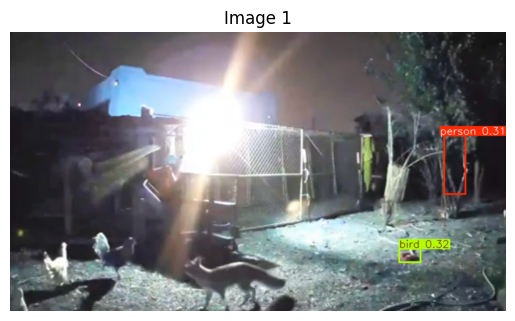

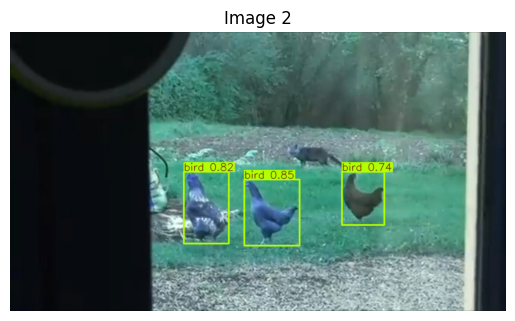

In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Charger modèle COCO
model = YOLO("yolov8n.pt")

# Faire l'inférence
results_1 = model("/content/10t_mp4-0004.jpg")
results_2 = model("/content/12t_mp4-0046.jpg")

# Récupérer l'image avec les bounding boxes dessinées
annotated_image_1 = results_1[0].plot()
annotated_image_2 = results_2[0].plot()

# Afficher avec matplotlib
plt.imshow(annotated_image_1)
plt.axis("off")
plt.title("Image 1")
plt.show()

plt.imshow(annotated_image_2)
plt.axis("off")
plt.title("Image 2")
plt.show()


On constate que le modèle v8 entrainé sur COCO n'a pas les classes nécessaires pour reconnaitre le renard ni les poules (identifiées commes oiseaux).
Par ailleurs, la qualité variable des images peut expliquer l'absence de détection parfois.

=> Il est donc bien nécessaire de fine-tuner l'apprentissage via YOLO11

# Utilisation de YOLO11

1.   Entrainement
2.   Validation du modèle
3.   Utilisation du modèle sur des images de test



## Entrainement


1.   Load des données et entrainement
2.   Métriques d'évaluation
3.   Affichage des batchs de validation



### Load des données et entrainement

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("crueyzeraphal")
project = workspace.project("fox-vs-gallinaceous")
version = project.version(2)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to fox-VS-gallinaceous-2 in yolov11:: 100%|██████████| 2093/2093 [00:00<00:00, 4783.85it/s]


In [11]:
# Charger le modèle YOLO
model = YOLO("yolo11s.pt")

# Entraîner avec un taux d'apprentissage et un optimiseur spécifiques
model.train(
    data=f"{dataset.location}/data.yaml",  # Chemin vers le fichier de données
    epochs=10,                             # Nombre d'époques
    imgsz=1024,                             # Taille des images
    lr0=0.001,                             # Nouveau taux d'apprentissage initial
    optimizer='AdamW',                     # Optimiseur personnalisé
    plots=True                             # Générer les graphiques
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/fox-VS-gallinaceous-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, pat

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7fa05ad880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

### Métriques d'évaluation

In [14]:
!ls {HOME}/datasets/runs/detect/train/

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


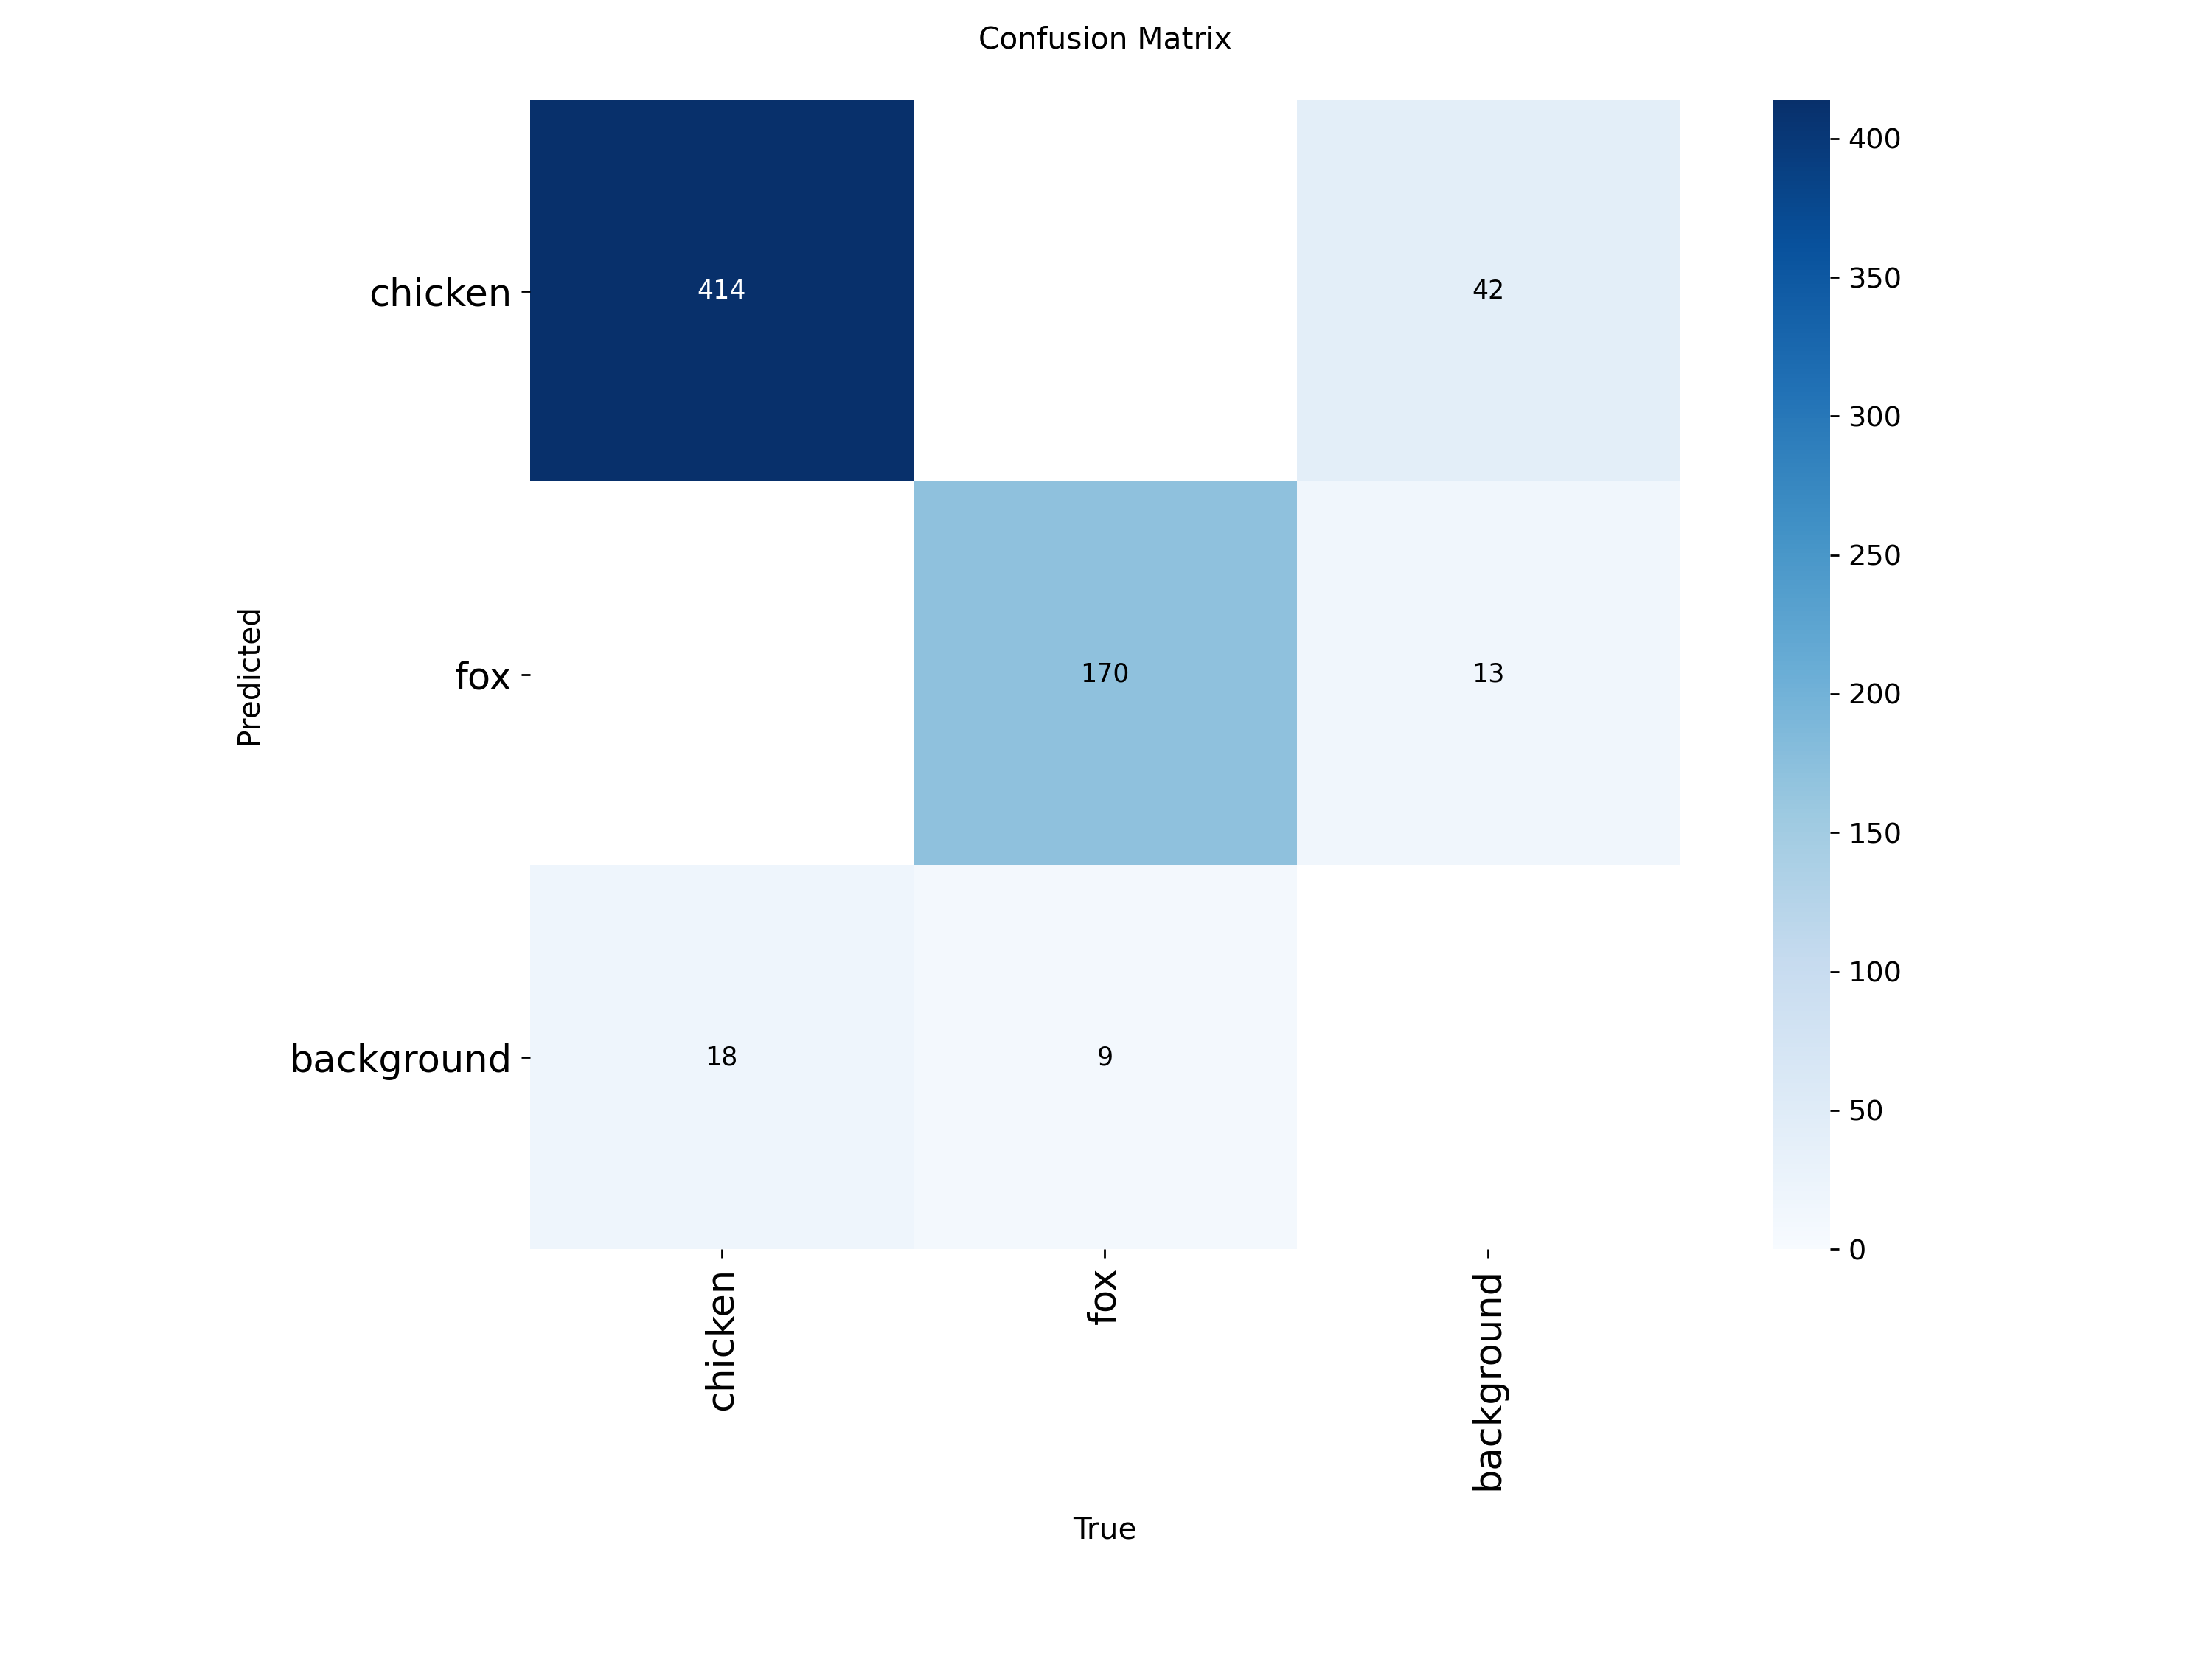

In [15]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

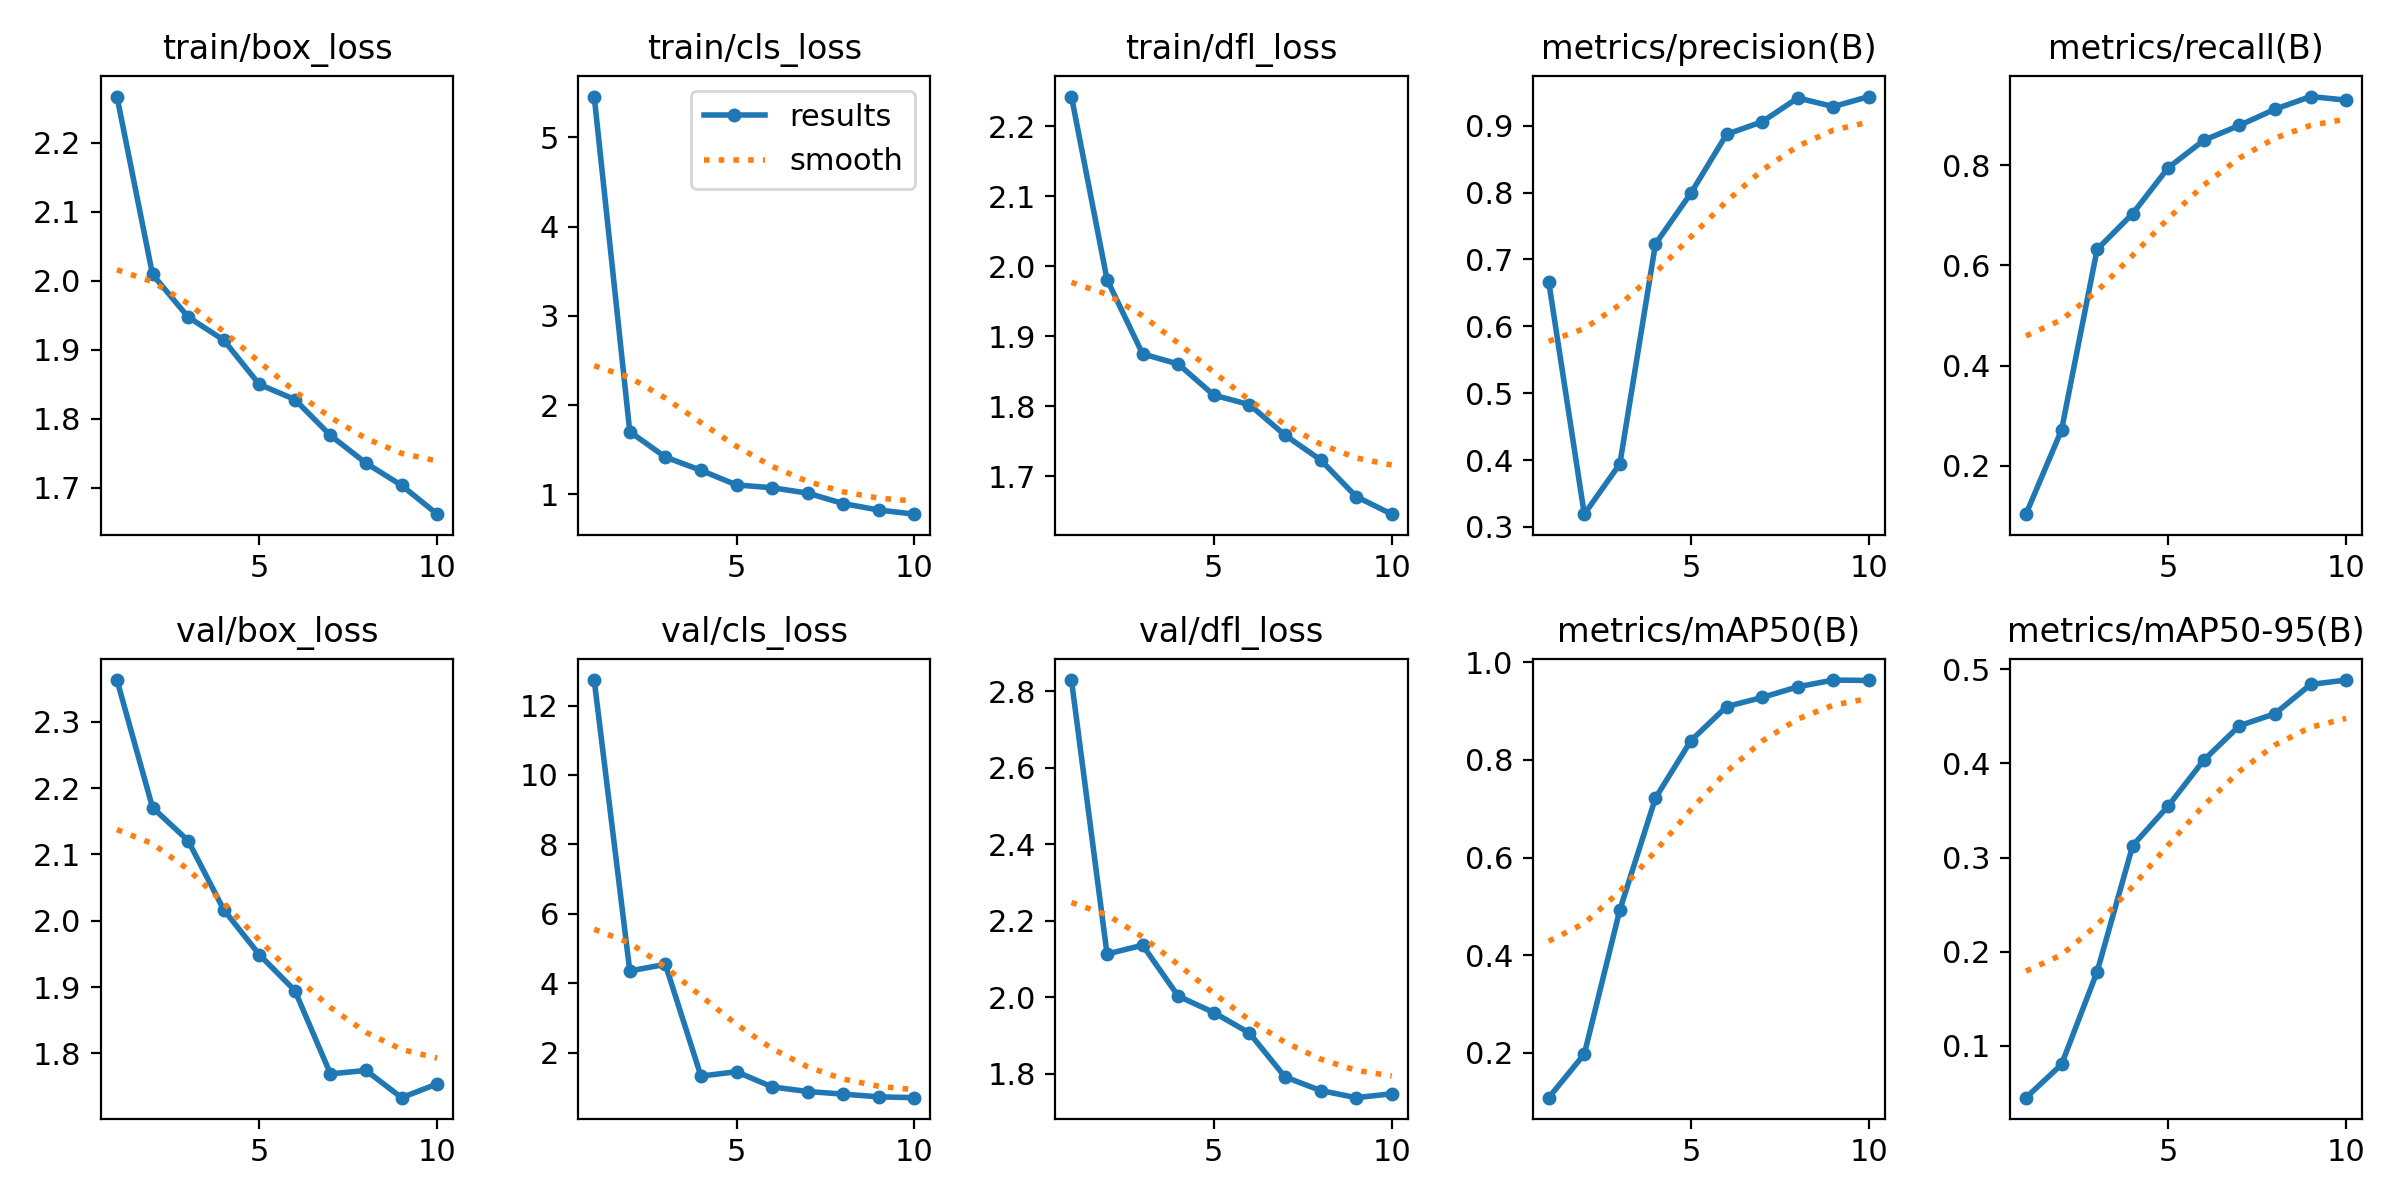

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

### Affichage des batchs de validation

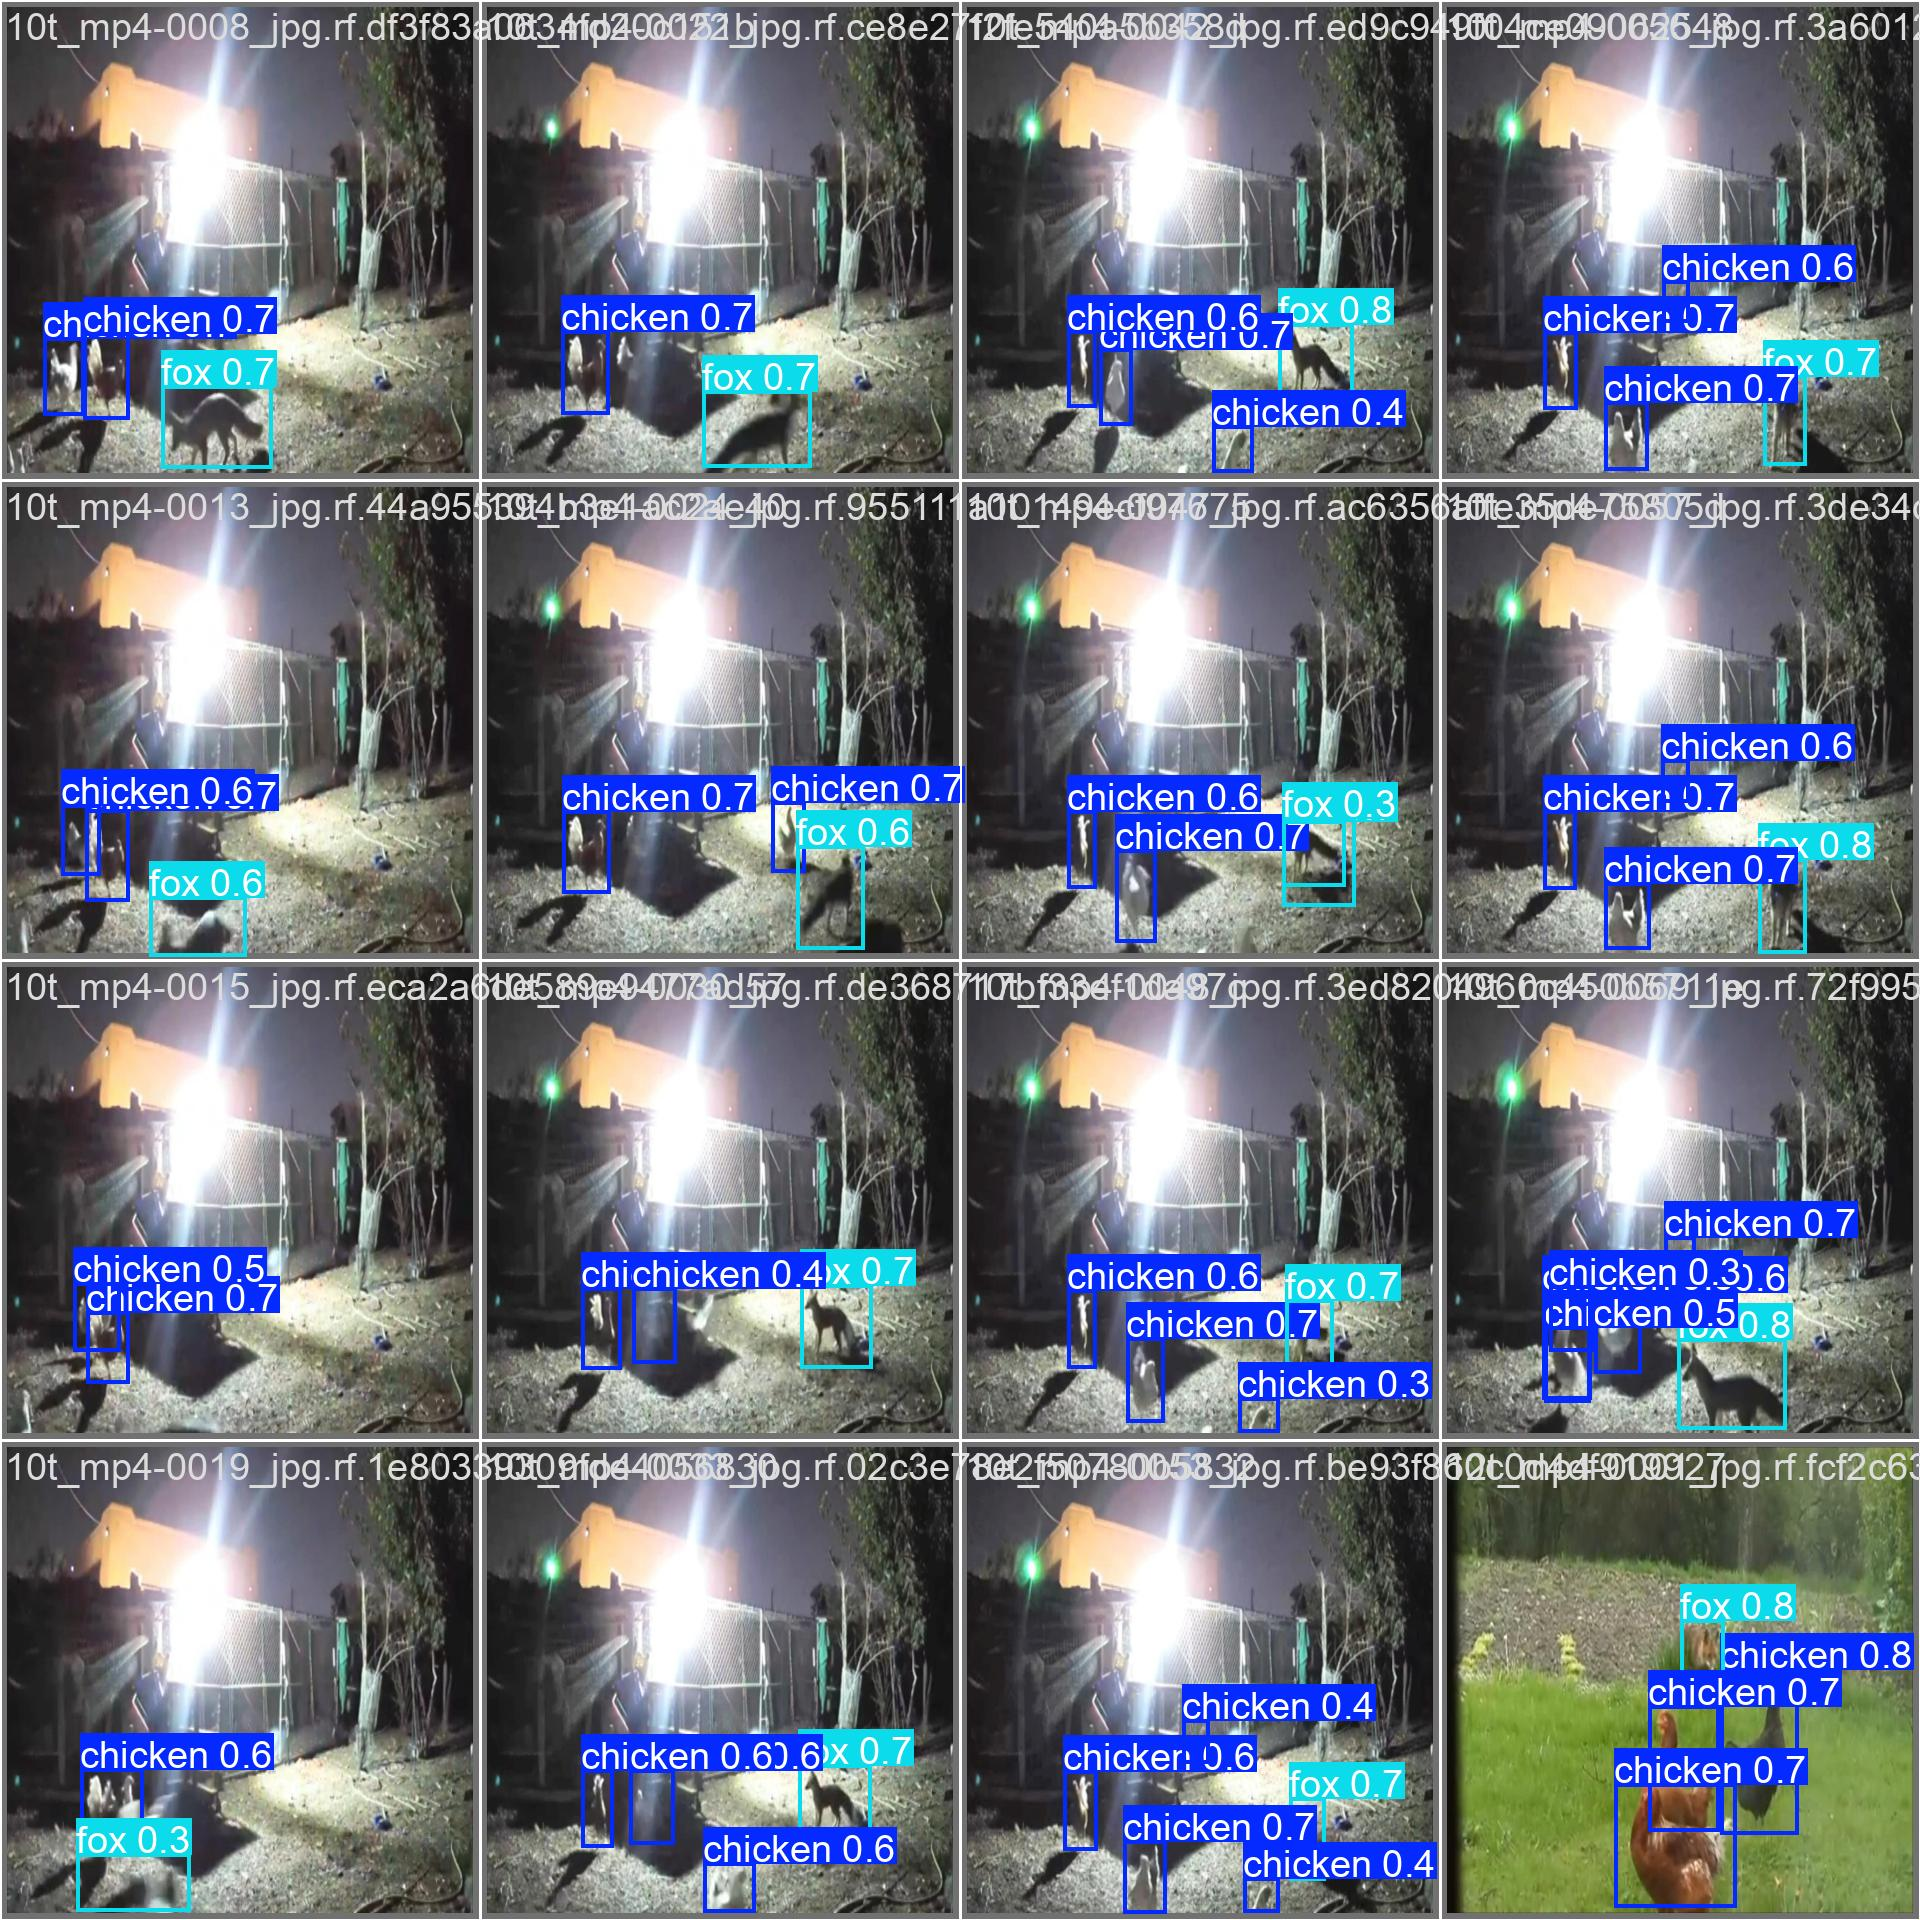

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/datasets/runs/detect/train/val_batch0_pred.jpg', width=800)

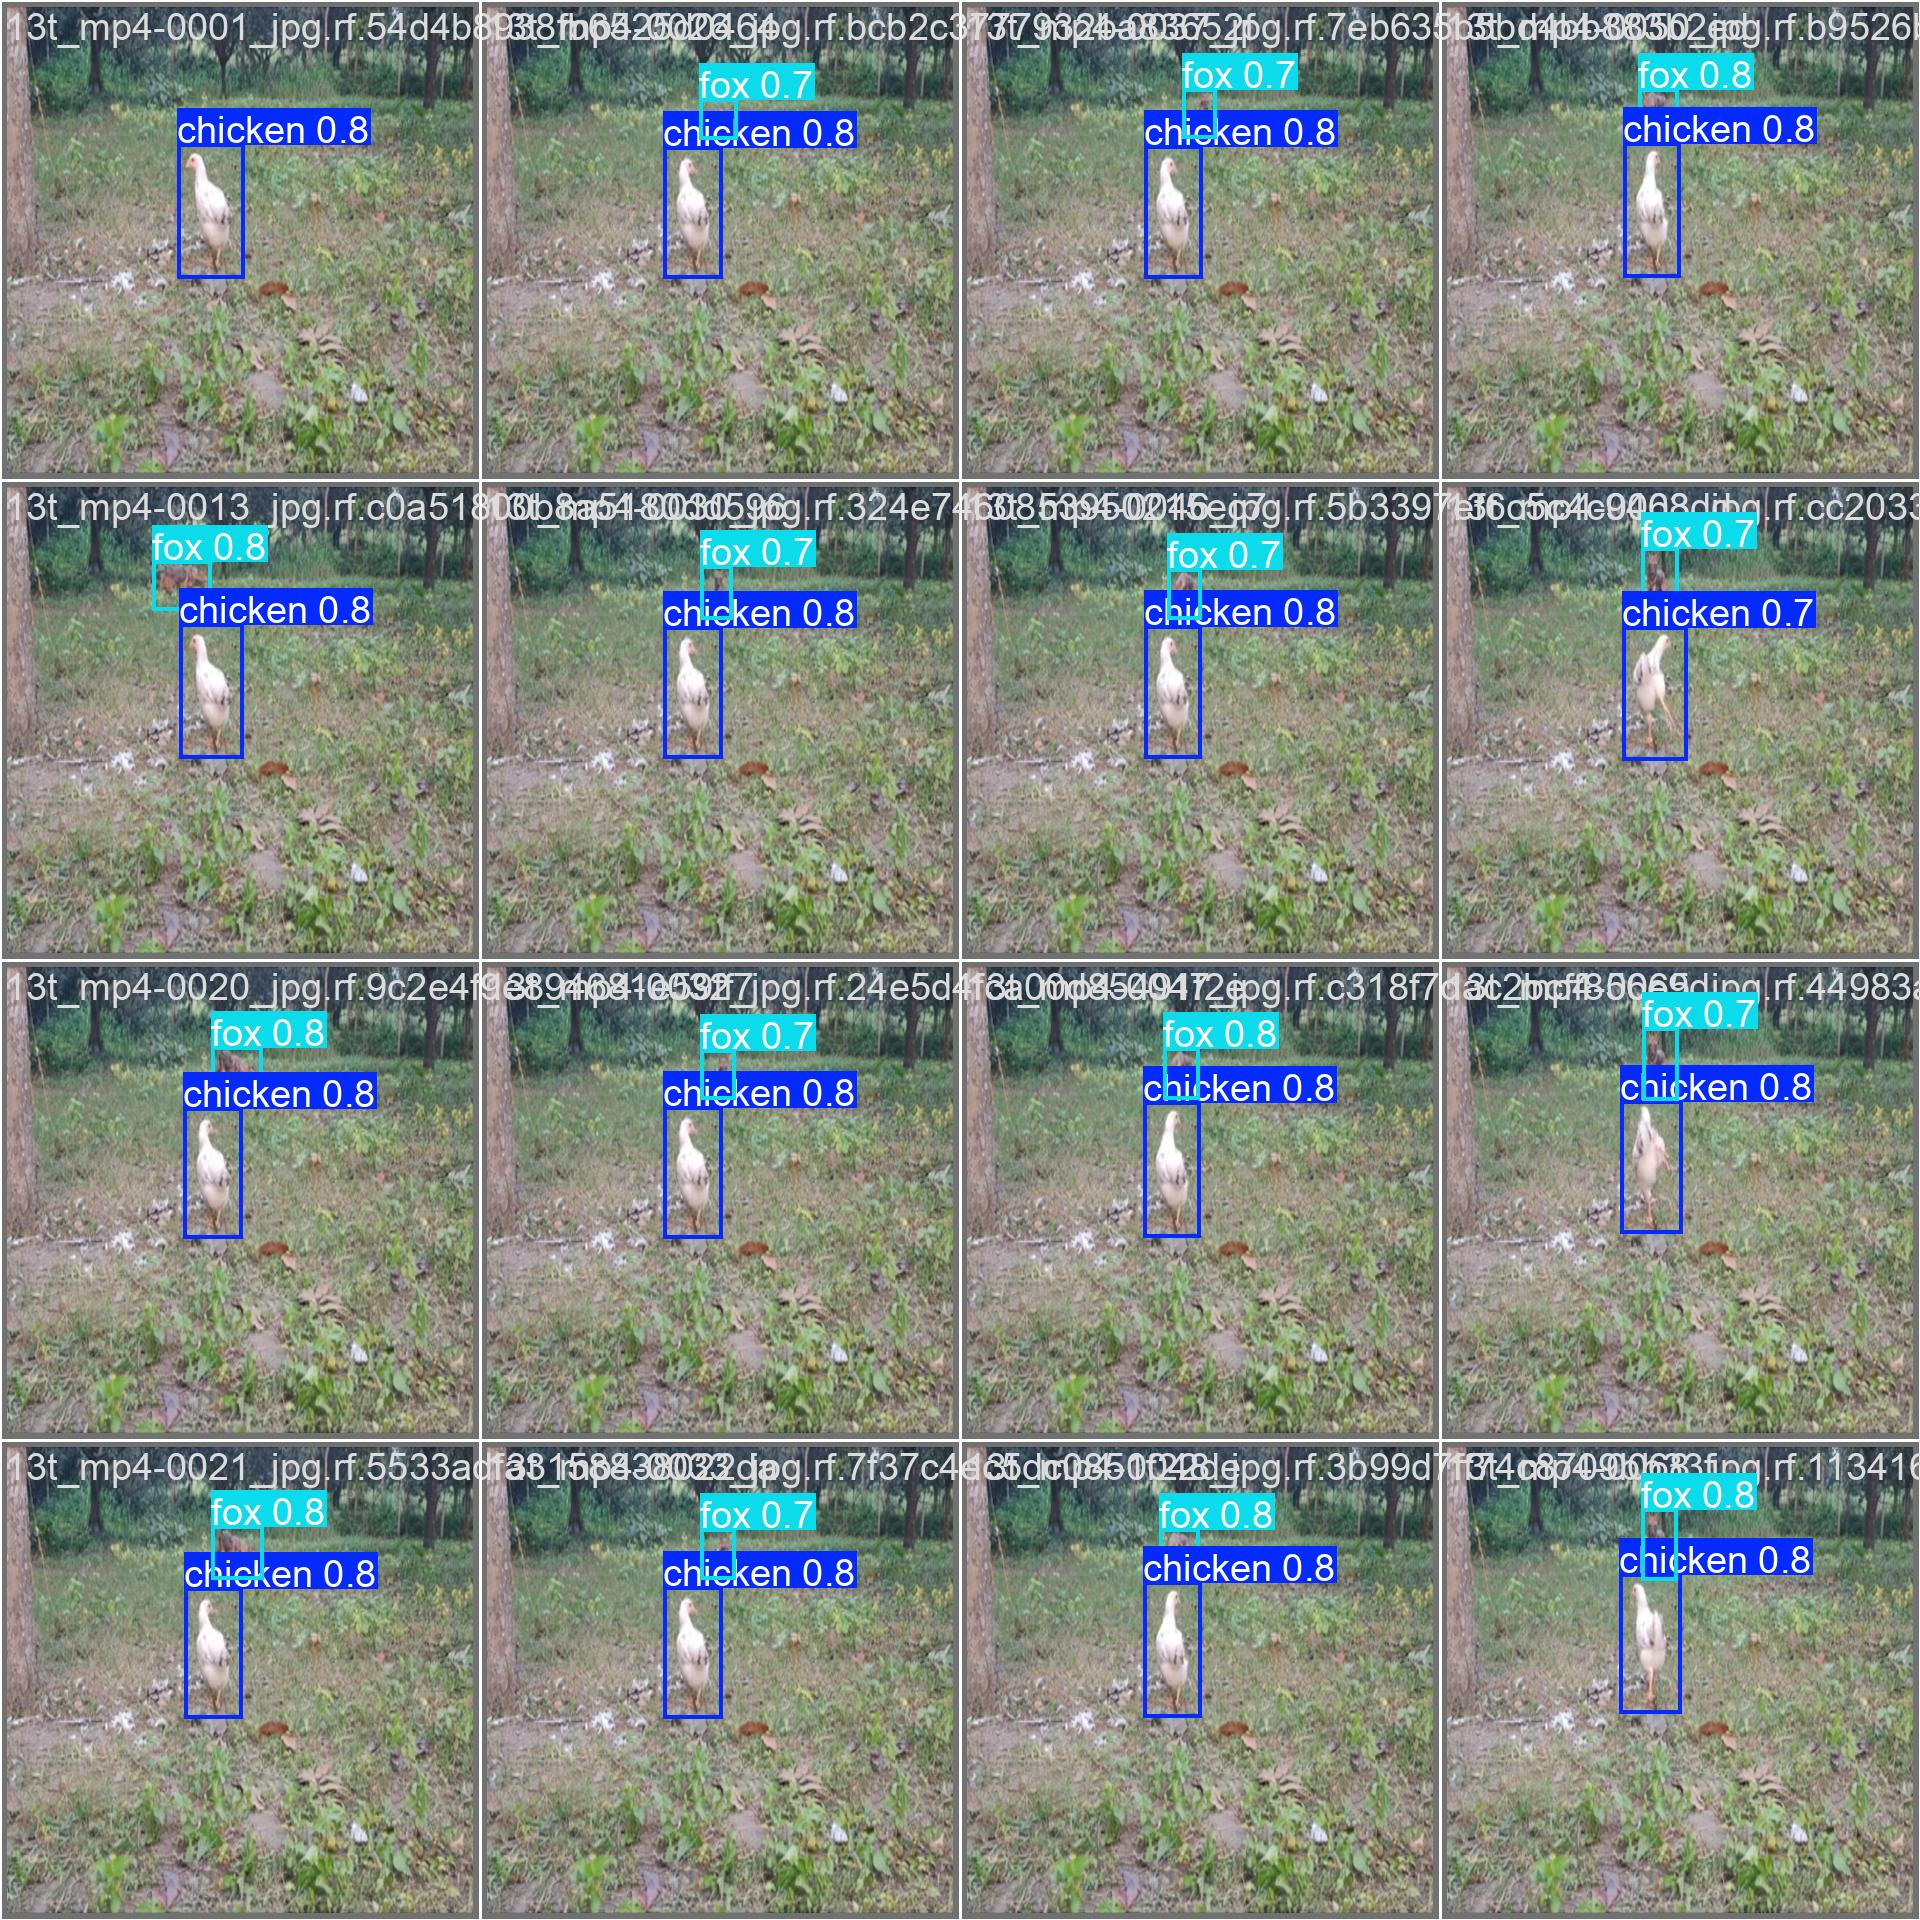

In [19]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/datasets/runs/detect/train/val_batch1_pred.jpg', width=800)

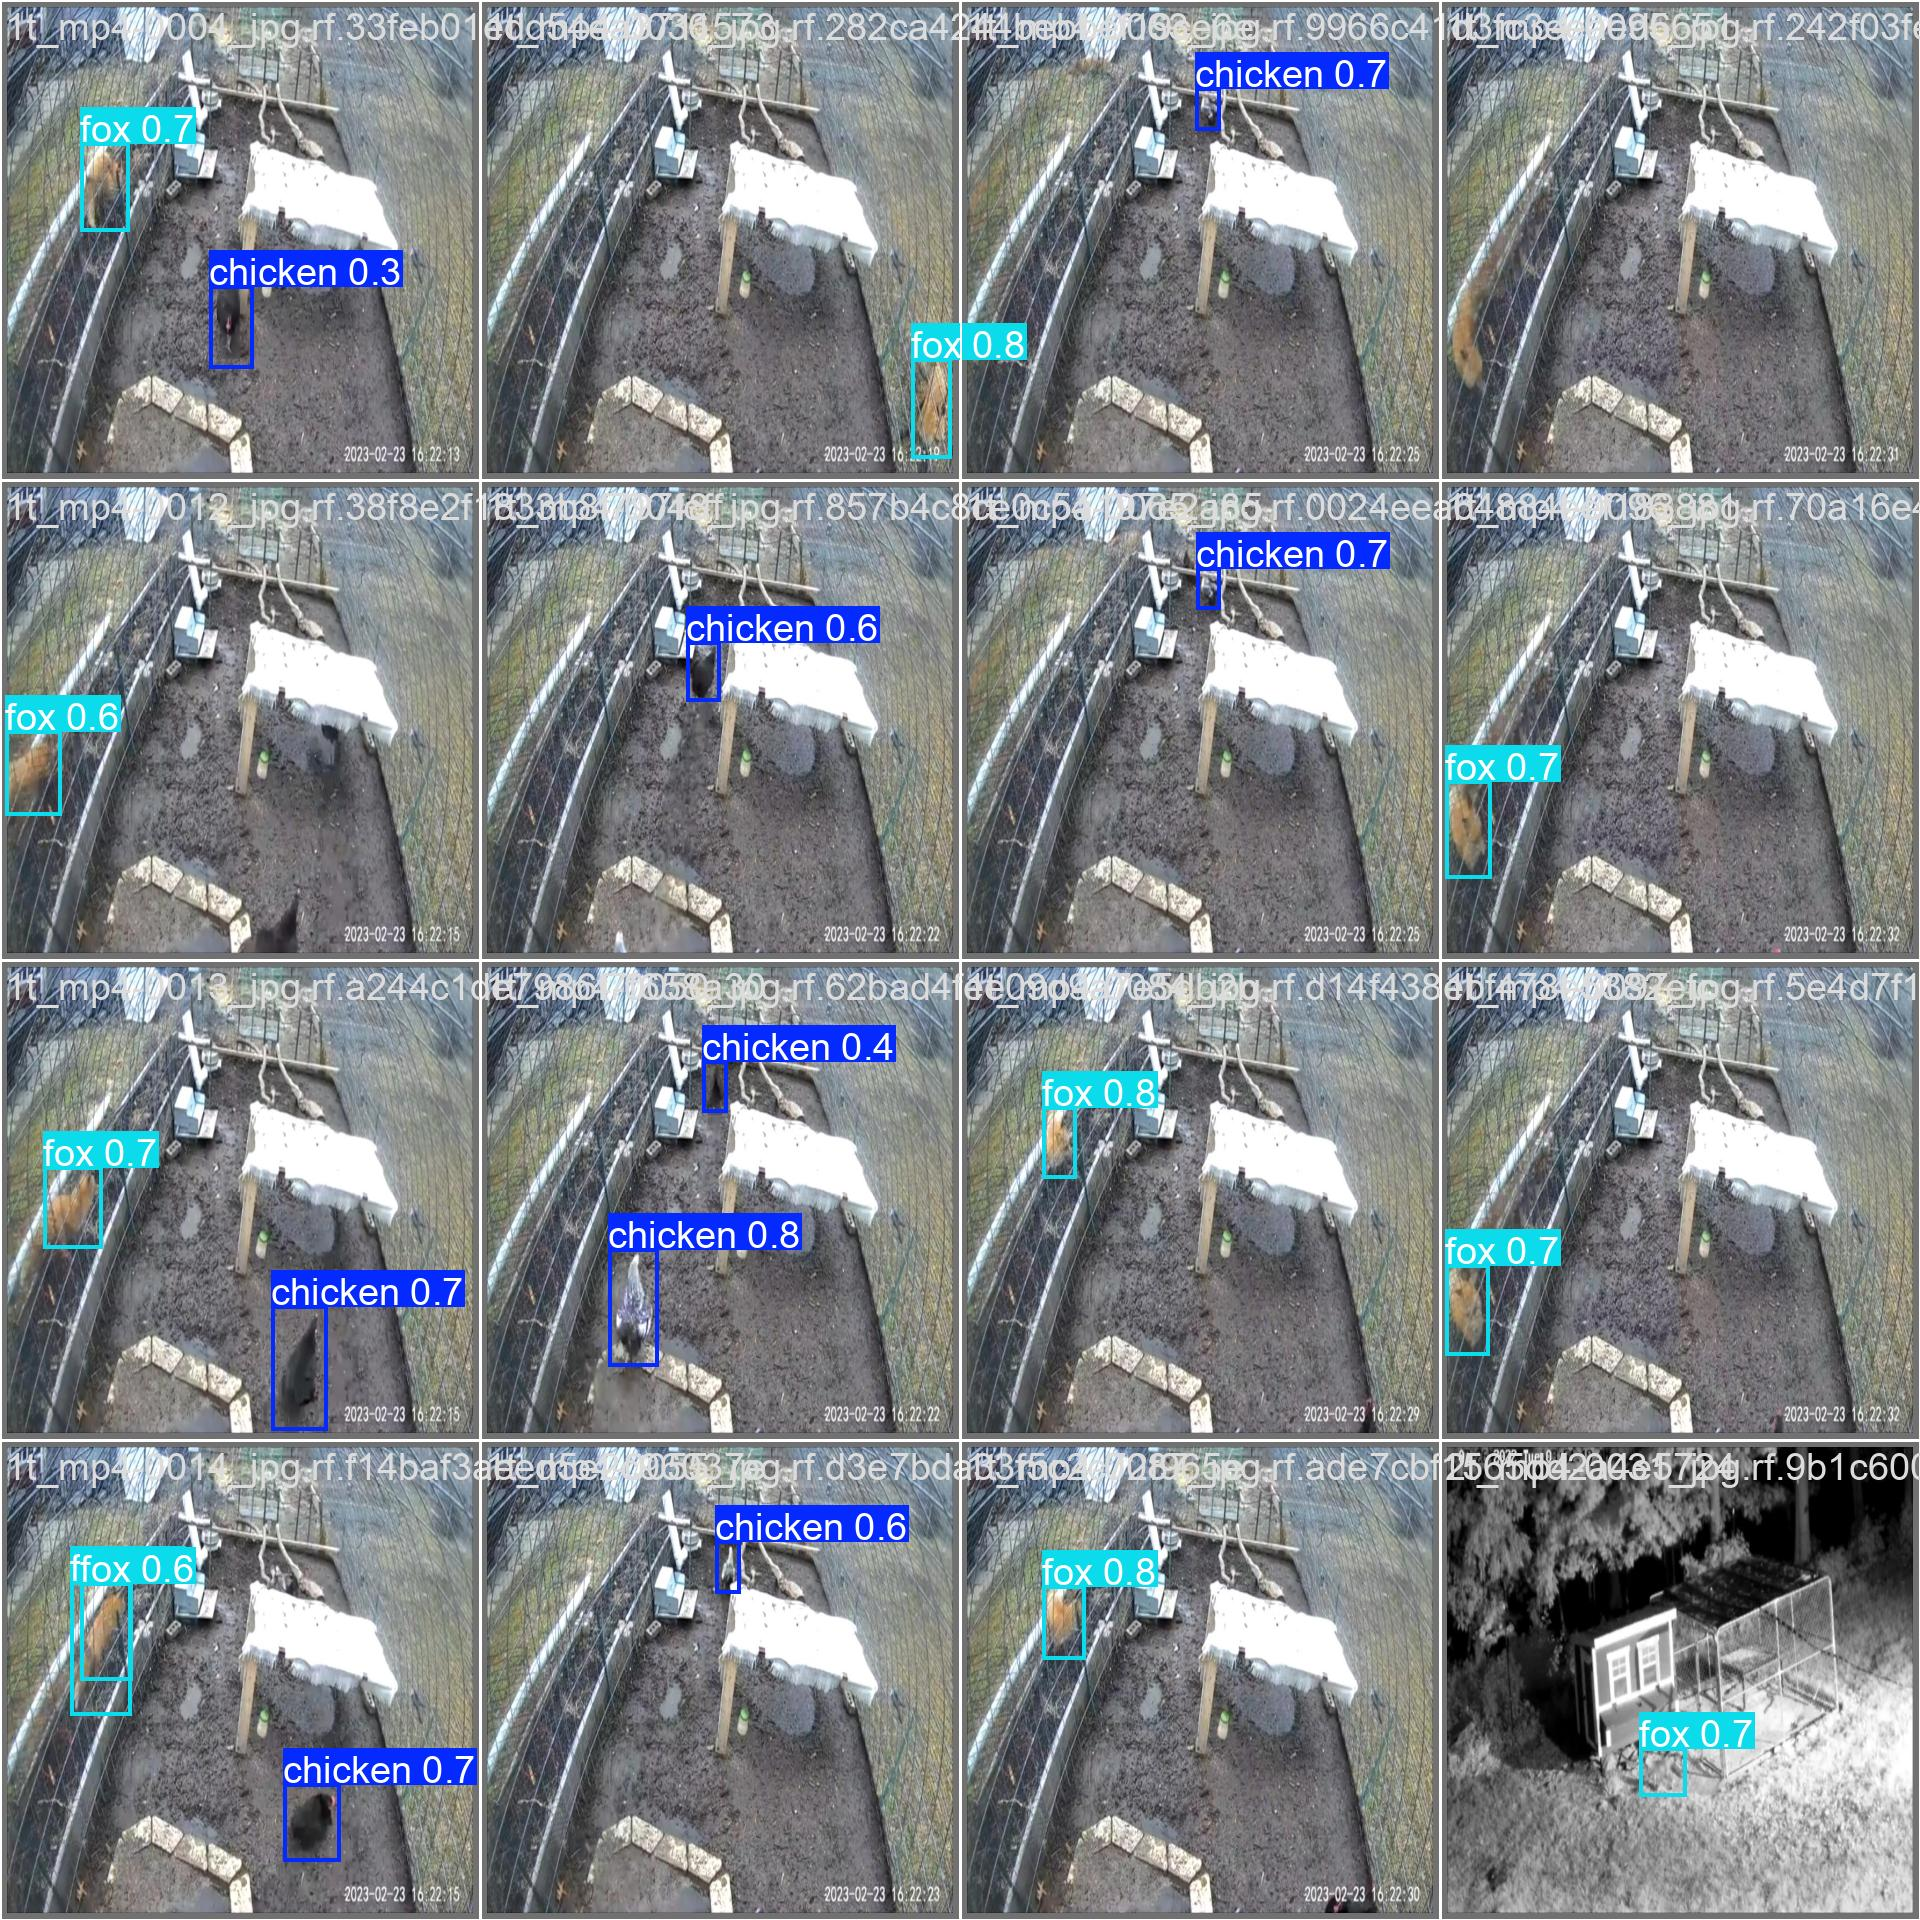

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=800)

## Validation du modèle

In [22]:
!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11s summary (fused): 101 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2728.8±521.3 MB/s, size: 107.2 KB)
val: Scanning /content/datasets/fox-VS-gallinaceous-2/valid/labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 201/201 29.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.5it/s 8.6s
                   all        201        611      0.944       0.93      0.962      0.488
               chicken        163        432      0.944      0.933       0.96      0.513
                   fox        173        179      0.944      0.927      0.965      0.464
Speed: 6.7ms preprocess, 28.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/datasets/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


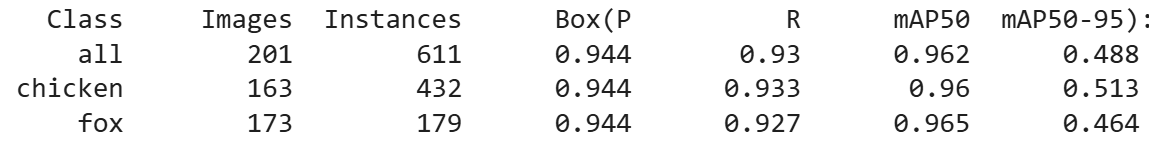

## Utilisation du modèle sur des images de test

1.   Test sur l'ensemble de test du dataset
2.   Test sur des images hors dataset



### Test sur l'ensemble de test du dataset

On choisit un seuil de confiance à 0.25 car on observe dans dans les images de validation certains seuils sont bas et notre domaine ne requiert pas une exigence élevé de détection : on souhaite limiter les attaques de renards donc les détecter le plus possible.

In [25]:
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11s summary (fused): 101 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/112 /content/datasets/fox-VS-gallinaceous-2/test/images/10t_mp4-0003_jpg.rf.00e269000e6fa094c8b7ac9860855128.jpg: 1024x1024 2 chickens, 1 fox, 25.4ms
image 2/112 /content/datasets/fox-VS-gallinaceous-2/test/images/10t_mp4-0010_jpg.rf.9e92d5719b089f59179bd28391a9abcf.jpg: 1024x1024 2 chickens, 1 fox, 25.4ms
image 3/112 /content/datasets/fox-VS-gallinaceous-2/test/images/10t_mp4-0011_jpg.rf.537408654b2059c7f689bcfe7957dd19.jpg: 1024x1024 2 chickens, 1 fox, 25.4ms
image 4/112 /content/datasets/fox-VS-gallinaceous-2/test/images/10t_mp4-0020_jpg.rf.ff9c0b846953cf7a4aae559f004540e0.jpg: 1024x1024 3 chickens, 1 fox, 25.3ms
image 5/112 /content/datasets/fox-VS-gallinaceous-2/test/images/10t_mp4-0021_jpg.rf.1f58b41eb5de928175137f0d25d8c02f.jpg: 1024x1024 2 chickens, 1 fox, 25.5ms
image 6/112 /content/datasets/fox-VS-gallin

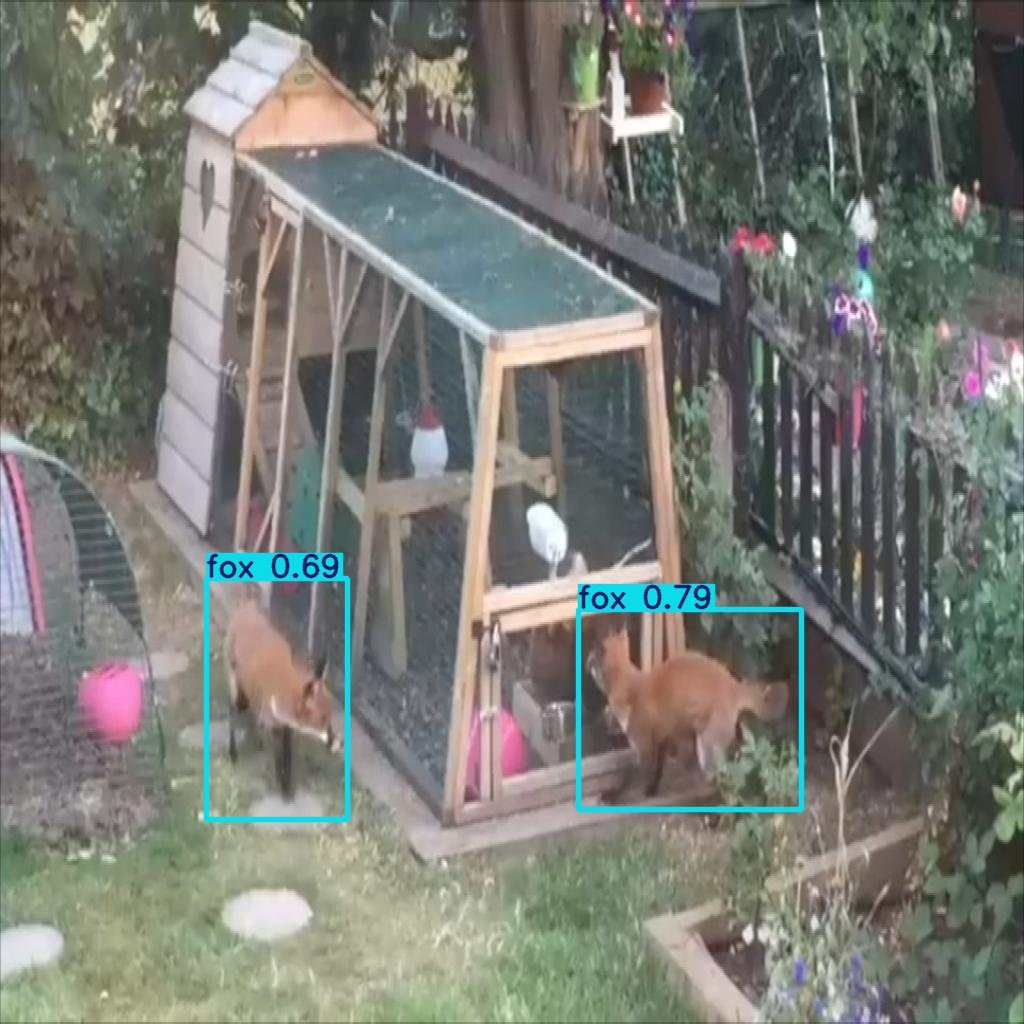

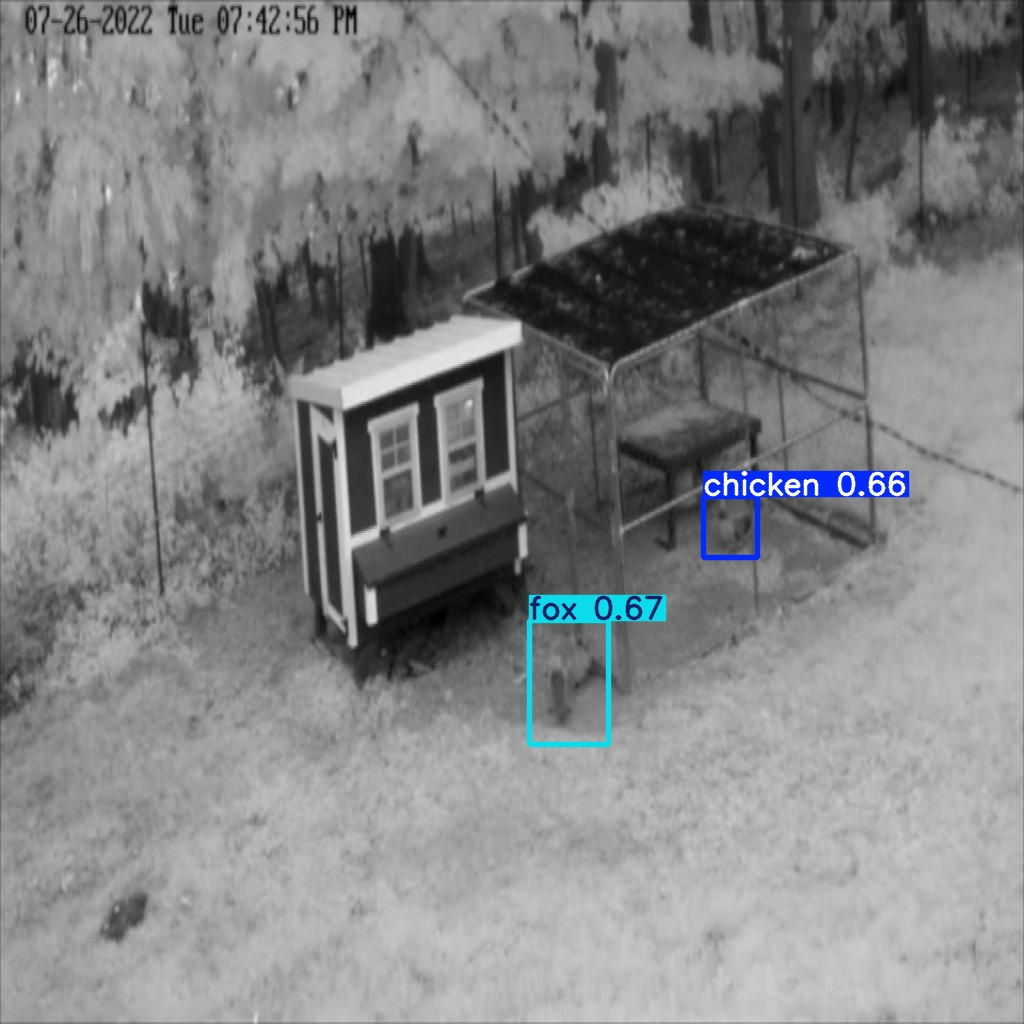

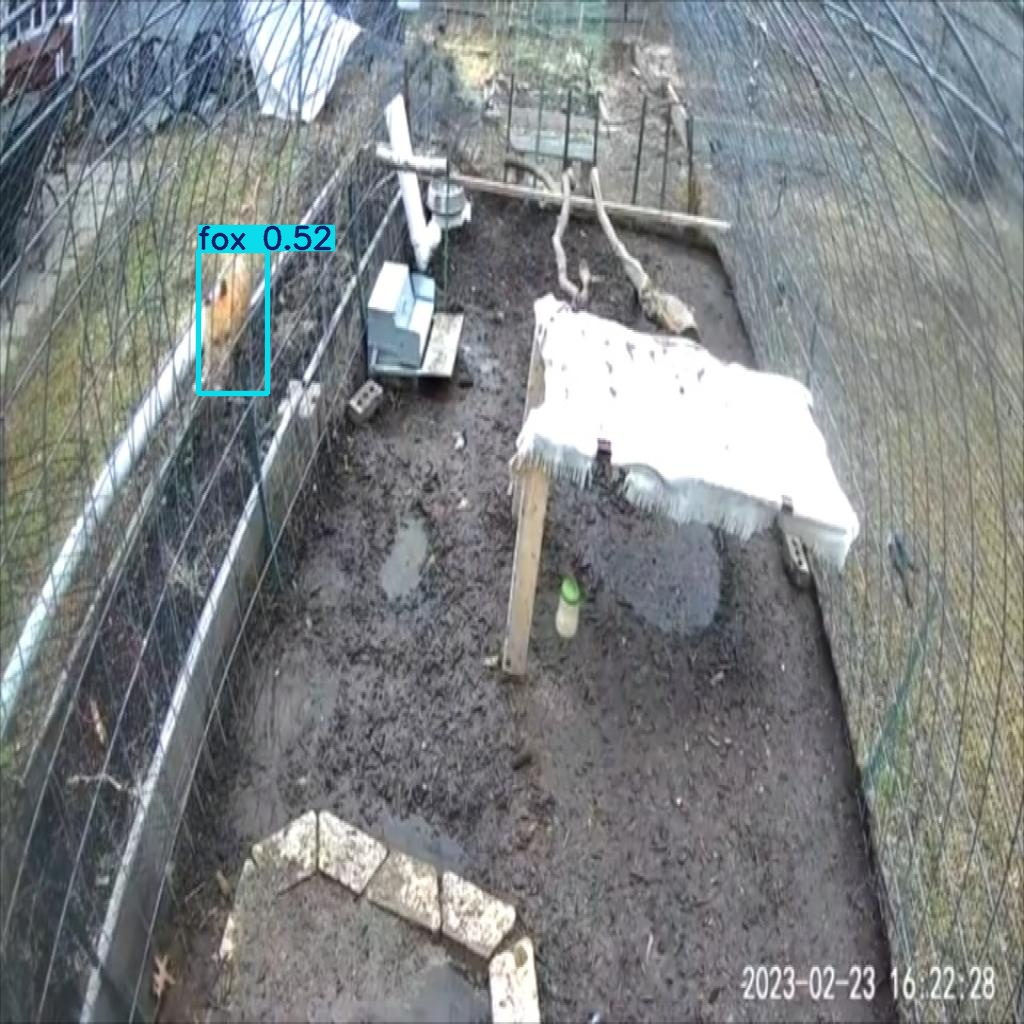

In [26]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/datasets/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Test sur des images hors dataset

Images avec d'autres espèces de volatiles


image 1/1 /content/Poules_Oies.png: 768x1024 2 chickens, 27.3ms
Speed: 9.3ms preprocess, 27.3ms inference, 1.9ms postprocess per image at shape (1, 3, 768, 1024)

image 1/1 /content/Poules_Oies_2.png: 768x1024 2 chickens, 26.1ms
Speed: 8.0ms preprocess, 26.1ms inference, 2.0ms postprocess per image at shape (1, 3, 768, 1024)


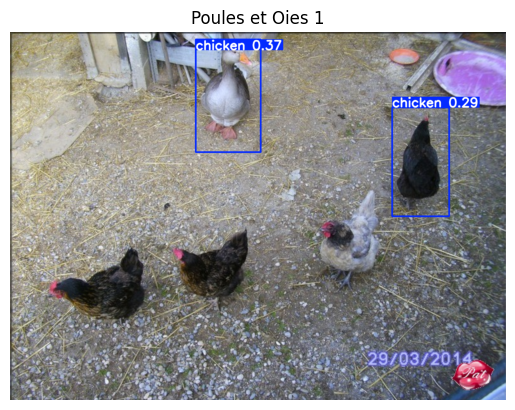

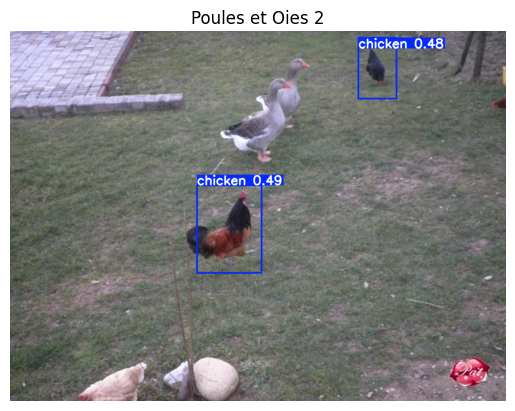

In [35]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Charger le modèle fine-tuné
model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

# Inférence sur image externe
results_1 = model("/content/Poules_Oies.png")
results_2 = model("/content/Poules_Oies_2.png")

# Récupérer l'image annotée
annotated_image_1 = results_1[0].plot()
annotated_image_2 = results_2[0].plot()

# Convertir BGR -> RGB pour matplotlib
annotated_image_1 = cv2.cvtColor(annotated_image_1, cv2.COLOR_BGR2RGB)
annotated_image_2 = cv2.cvtColor(annotated_image_2, cv2.COLOR_BGR2RGB)

# Afficher correctement
plt.imshow(annotated_image_1)
plt.title("Poules et Oies 1")
plt.axis("off")
plt.show()

plt.imshow(annotated_image_2)
plt.title("Poules et Oies 2")
plt.axis("off")
plt.show()



Images avec beaucoup de poules


image 1/1 /content/Poules_Multiple.png: 736x1024 2 chickens, 2 foxs, 26.5ms
Speed: 5.5ms preprocess, 26.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1024)

image 1/1 /content/Poules_Nombreuses.png: 576x1024 8 chickens, 1 fox, 20.4ms
Speed: 4.3ms preprocess, 20.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 1024)


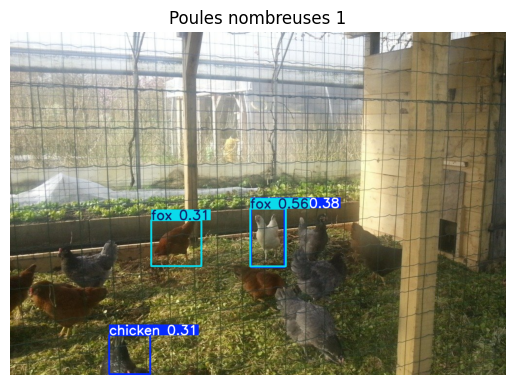

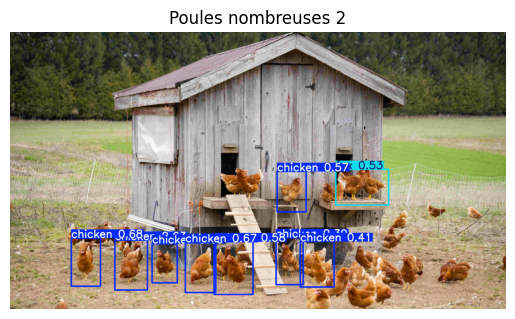

In [38]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Charger le modèle fine-tuné
model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

# Inférence sur image externe
results_1 = model("/content/Poules_Multiple.png")
results_2 = model("/content/Poules_Nombreuses.png")

# Récupérer l'image annotée
annotated_image_1 = results_1[0].plot()
annotated_image_2 = results_2[0].plot()

# Convertir BGR -> RGB pour matplotlib
annotated_image_1 = cv2.cvtColor(annotated_image_1, cv2.COLOR_BGR2RGB)
annotated_image_2 = cv2.cvtColor(annotated_image_2, cv2.COLOR_BGR2RGB)

# Afficher correctement
plt.imshow(annotated_image_1)
plt.title("Poules nombreuses 1")
plt.axis("off")
plt.show()

plt.imshow(annotated_image_2)
plt.title("Poules nombreuses 2")
plt.axis("off")
plt.show()


